In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
np.random.seed(42)
m,p= 100,1
X = np.random.randn(m, p)
beta = np.array([2])
e = np.random.normal(0,1,(m,))
Y = X@beta+ e


In [ ]:
somme_e = np.sum(e)
print(somme_e)

2.2304587049923885


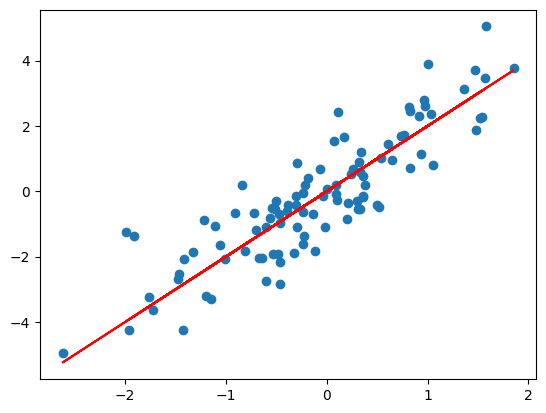

In [ ]:
plt.scatter(X[:,0], Y)
plt.plot(X[:,0],X@beta, color='red')
plt.show()

In [ ]:
data = np.hstack((X,Y.reshape(m,1)))
np.random.shuffle(data)
train = int(m*0.8)
X_train = data[:train,:-1]
Y_train = data[:train,-1]
X_test = data[train:,:-1]
Y_test = data[train:,-1]

Stochastic Gradient Descent

---



In [ ]:
X[np.random.randint(m)].shape

(1,)

In [ ]:
class sgd:
  def __init__(self,learning_rate = 0.01):
    self.learning_rate = learning_rate
    self.theta = None
    self.biais = None
    self.MSE = None
    self.stop = None
  def predict(self,x):
    return x.dot(self.theta) + self.biais
  def calcul_grad(self,x, error):
    return 2*np.dot(x,error)
  def fit(self,x,y,n_iteration=150,seuil = 1e-5):
    m,p= x.shape[0], x.shape[1]
    self.theta = np.random.randn(p)
    self.biais = 0
    MSE = [0]
    stop = n_iteration
    for k in range(n_iteration):
      for i in range(m):
        idx = np.random.randint(m)
        x_i = x[idx]
        y_i = y[idx]
        error = self.predict(x_i) - y_i
        gradient = self.calcul_grad(x_i, error)
        self.theta = self.theta - self.learning_rate * gradient
        self.biais = self.biais - self.learning_rate * error.sum()
      mse = np.mean(np.square(self.predict(x) - y))
      MSE.append(mse)
      if abs(mse - MSE[-2]) < seuil:
        print(f"iteration {k}")
        print(f"mse {mse}")
        stop = k
        break
    self.MSE = MSE[1:]
    self.stop = stop
    print(self.theta)
    print(f"iteration {k}")
    print(f"mse {mse}")




In [ ]:
SGD = sgd()
SGD.fit(X_train,Y_train)

[1.79576387]
iteration 149
mse 0.7595072650392451


In [ ]:
y_p1=SGD.predict(X_train)

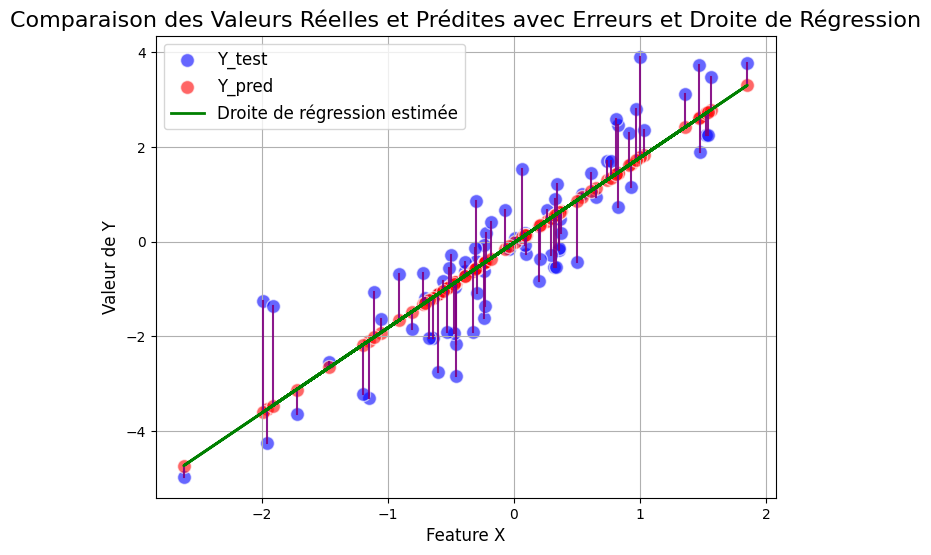

In [ ]:
# Tracer les résultats
plt.figure(figsize=(8,6))

# Scatter plot des valeurs réelles (Y_test)
plt.scatter(X_train, Y_train, color='blue', label='Y_test', alpha=0.6, edgecolors='w', s=100)

# Scatter plot des valeurs prédites (Y_pred)
plt.scatter(X_train, y_p1, color='red', label='Y_pred', alpha=0.6, edgecolors='w', s=100)

# Matérialiser l'erreur avec des lignes verticales entre Y_test et Y_pred
for i in range(len(X_train)):
    plt.plot([X_train[i, 0], X_train[i, 0]], [Y_train[i], y_p1[i]], color='purple', linestyle='-', alpha=0.9)

# Tracer la droite de régression estimée par le modèle
plt.plot(X_train, SGD.predict(X_train), color='green', label='Droite de régression estimée', linewidth=2)

# Ajouter un titre
plt.title('Comparaison des Valeurs Réelles et Prédites avec Erreurs et Droite de Régression', fontsize=16)

# Ajouter des labels d'axes
plt.xlabel('Feature X', fontsize=12)
plt.ylabel('Valeur de Y', fontsize=12)

# Ajouter une légende
plt.legend(loc='best', fontsize=12)

# Ajouter une grille pour une meilleure lecture
plt.grid(True)

# Afficher le graphique
plt.show()

Mini Batch

---



In [ ]:
class MiniBatch:
  def __init__(self,learning_rate = 0.01,batch_size = 5):
    self.learning_rate = learning_rate
    self.batch_size = batch_size
    self.theta = None
    self.biais = None
    self.MSE = None
    self.stop = None

  def predict(self,x, biais = 1):
    if biais == 0:
      return x.dot(self.theta)
    else :
      return x.dot(self.theta) + self.biais
  def calcul_grad(self,x, error):
    return 2*np.dot(x.T,error)

  def fit(self,x,y,n_iteration=150,seuil = 1e-5):
    m,p= x.shape
    X_b = np.c_[np.ones(m), x]
    data = np.hstack((X_b,y.reshape(m,1)))
    np.random.shuffle(data)
    X_b = data[:,:-1]
    Y_b = data[:,-1]
    self.theta = np.random.randn(p+1)
    MSE = [0]
    step = m//self.batch_size
    reste = m%self.batch_size
    stop = n_iteration
    for k in range(n_iteration):
      for i in range(step):
        x_i = X_b[i*self.batch_size:(i+1)*self.batch_size]
        y_i = Y_b[i*self.batch_size:(i+1)*self.batch_size]
        error = self.predict(x_i,0) - y_i
        gradient = (1/self.batch_size)*self.calcul_grad(x_i, error)
        self.theta = self.theta - self.learning_rate * gradient
      if reste != 0 :
        x_i = X_b[m-reste:]
        y_i = Y_b[m-reste:]
        error = self.predict(x_i,0) - y_i
        gradient = (1/reste)*self.calcul_grad(x_i, error)
        self.theta = self.theta - self.learning_rate * gradient
      mse = np.mean(np.square(self.predict(X_b,0) - Y_b))
      MSE.append(mse)
      if abs(mse - MSE[-2]) < seuil:
        print(f"iteration {k+1}")
        print(f"mse {mse}")
        stop = k+1
        break

    self.theta = self.theta[1:]
    self.biais = self.theta[0]
    self.MSE = MSE[1:]
    self.stop = stop
    print(self.theta,self.biais)


In [ ]:
MB = MiniBatch()
MB.fit(X_train,Y_train)

iteration 21
mse 0.756712968152874
[1.85092338] 1.8509233756308003


In [ ]:
y_p2 = MB.predict(X_train)

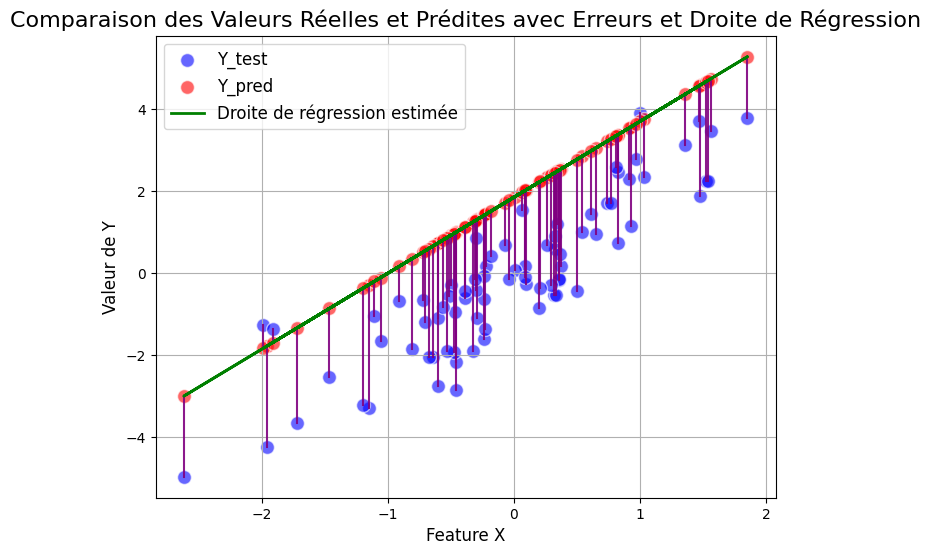

In [ ]:
# Tracer les résultats
plt.figure(figsize=(8,6))

# Scatter plot des valeurs réelles (Y_test)
plt.scatter(X_train, Y_train, color='blue', label='Y_test', alpha=0.6, edgecolors='w', s=100)

# Scatter plot des valeurs prédites (Y_pred)
plt.scatter(X_train, y_p2, color='red', label='Y_pred', alpha=0.6, edgecolors='w', s=100)

# Matérialiser l'erreur avec des lignes verticales entre Y_test et Y_pred
for i in range(len(X_train)):
    plt.plot([X_train[i, 0], X_train[i, 0]], [Y_train[i], y_p2[i]], color='purple', linestyle='-', alpha=0.9)

# Tracer la droite de régression estimée par le modèle
plt.plot(X_train, MB.predict(X_train), color='green', label='Droite de régression estimée', linewidth=2)

# Ajouter un titre
plt.title('Comparaison des Valeurs Réelles et Prédites avec Erreurs et Droite de Régression', fontsize=16)

# Ajouter des labels d'axes
plt.xlabel('Feature X', fontsize=12)
plt.ylabel('Valeur de Y', fontsize=12)

# Ajouter une légende
plt.legend(loc='best', fontsize=12)

# Ajouter une grille pour une meilleure lecture
plt.grid(True)

# Afficher le graphique
plt.show()

ADAM

In [ ]:
class Adam:
  def __init__(self,learning_rate = 0.1,Beta = [0.9,0.999],epsilon = 1e-8):
    self.learning_rate = learning_rate
    self.Beta = Beta
    self.epsilon = epsilon
    self.theta = None
    self.MSE = None
    self.stop = None

  def predict(self,x):
    return x.dot(self.theta)
  def calcul_grad(self,x, error):
    return 2*np.dot(x.T,error)
  def fit(self,x,y,n_iteration=150,seuil = 1e-5):
    m,p= x.shape
    self.theta = np.random.randn(p)
    nu = np.zeros(p)
    rho = np.zeros(p)
    stop = n_iteration
    MSE = [0]
    for k in range(n_iteration):
      error = self.predict(x) - y
      mse = np.mean(error**2)
      MSE.append(mse)
      if abs(mse - MSE[-2]) < seuil:
        print(f"iteration {k+1}")
        print(f"mse {mse}")
        stop = k+1
        break
      else :
        gradients =(1/m) * self.calcul_grad(x, error)
        nu = self.Beta[0]*nu + (1-self.Beta[0])*gradients
        rho = self.Beta[1]*rho + (1-self.Beta[1])*(gradients**2)
        nu_hat = nu/(1-self.Beta[0]**(k+1))
        rho_hat = rho/(1-self.Beta[1]**(k+1))
        b = nu_hat/(np.sqrt(rho_hat) + self.epsilon)
        self.theta = self.theta - self.learning_rate * b
    print(self.theta)
    self.MSE = MSE[1:]
    self.stop = stop

In [ ]:
adam = Adam()
adam.fit(X_train,Y_train)

iteration 66
mse 0.7584337985202134
[1.85653662]


In [ ]:
y_p3=adam.predict(X_train)

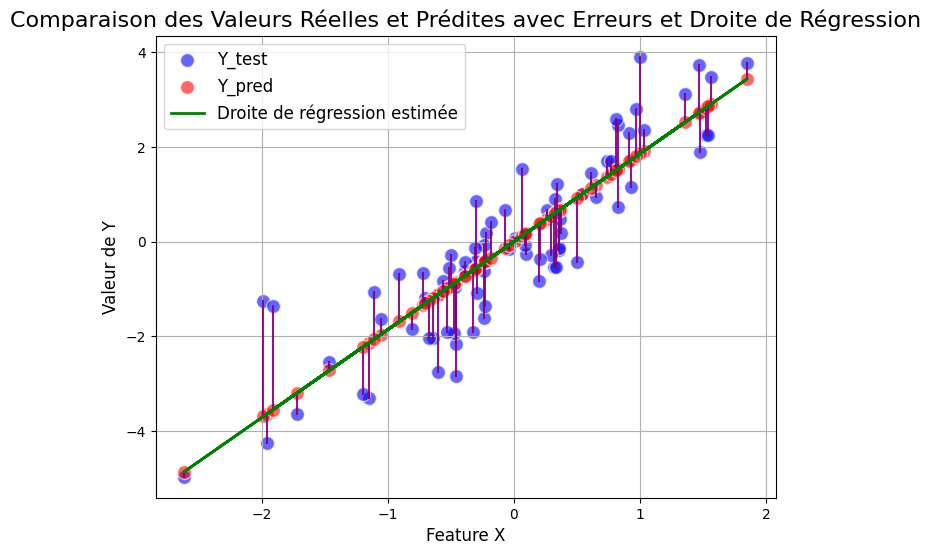

In [ ]:
# Tracer les résultats
plt.figure(figsize=(8,6))

# Scatter plot des valeurs réelles (Y_test)
plt.scatter(X_train, Y_train, color='blue', label='Y_test', alpha=0.6, edgecolors='w', s=100)

# Scatter plot des valeurs prédites (Y_pred)
plt.scatter(X_train, y_p3, color='red', label='Y_pred', alpha=0.6, edgecolors='w', s=100)

# Matérialiser l'erreur avec des lignes verticales entre Y_test et Y_pred
for i in range(len(X_train)):
    plt.plot([X_train[i, 0], X_train[i, 0]], [Y_train[i], y_p3[i]], color='purple', linestyle='-', alpha=0.9)

# Tracer la droite de régression estimée par le modèle
plt.plot(X_train, adam.predict(X_train), color='green', label='Droite de régression estimée', linewidth=2)

# Ajouter un titre
plt.title('Comparaison des Valeurs Réelles et Prédites avec Erreurs et Droite de Régression', fontsize=16)

# Ajouter des labels d'axes
plt.xlabel('Feature X', fontsize=12)
plt.ylabel('Valeur de Y', fontsize=12)

# Ajouter une légende
plt.legend(loc='best', fontsize=12)

# Ajouter une grille pour une meilleure lecture
plt.grid(True)

# Afficher le graphique
plt.show()

Partie 3 : Analyse des résultats


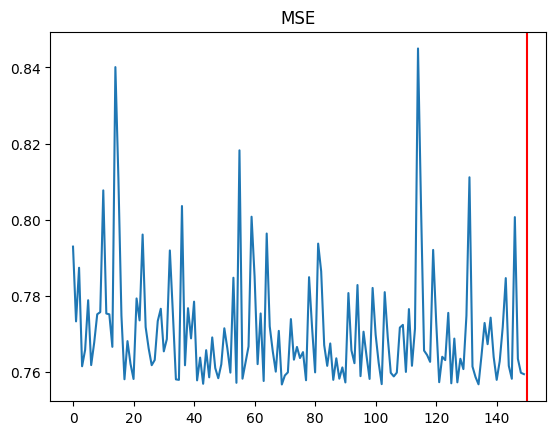

In [ ]:
import matplotlib.pyplot as plt
plt.plot(SGD.MSE)
plt.axvline(SGD.stop, color='red')
plt.title("MSE")
plt.show()

In [ ]:
MB.stop

21

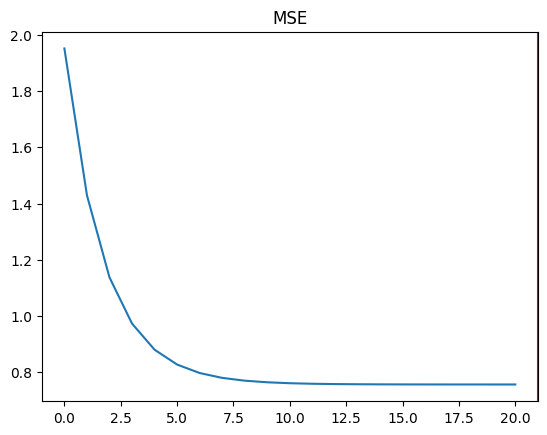

In [ ]:
import matplotlib.pyplot as plt
plt.plot(MB.MSE)
plt.axvline(MB.stop, color='red')
plt.title("MSE")
plt.show()

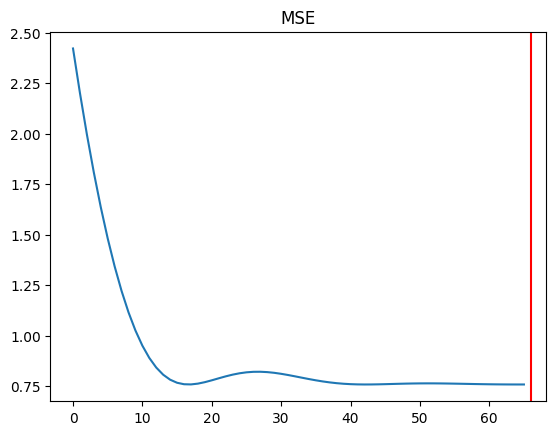

In [ ]:
import matplotlib.pyplot as plt
plt.plot(adam.MSE)
plt.axvline(adam.stop, color='red')
plt.title("MSE")
plt.show()

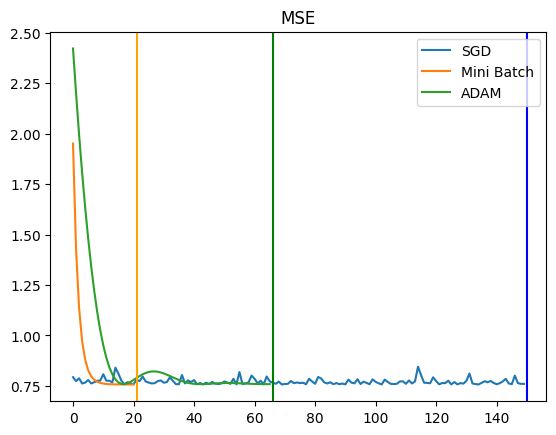

In [ ]:
import matplotlib.pyplot as plt
plt.plot(SGD.MSE)
plt.plot(MB.MSE)
plt.plot(adam.MSE)
plt.axvline(SGD.stop, color='blue')
plt.axvline(MB.stop, color='orange')
plt.axvline(adam.stop, color='green')
plt.legend(["SGD","Mini Batch","ADAM"])
plt.title("MSE")
plt.show()

Niveaux de Bruits

In [ ]:
e1, e2, e3, = np.random.normal(0,1,(m,)), np.random.normal(0,4,(m,)), np.random.normal(0,10,(m,))
y1 = X@beta + e1
y2 = X@beta + e2
y3 = X@beta + e3

[2.23005135]
iteration 149
mse 1.0216597244538133
[2.80665808]
iteration 149
mse 21.825281127715098
[0.98609103]
iteration 149
mse 93.58440795389717


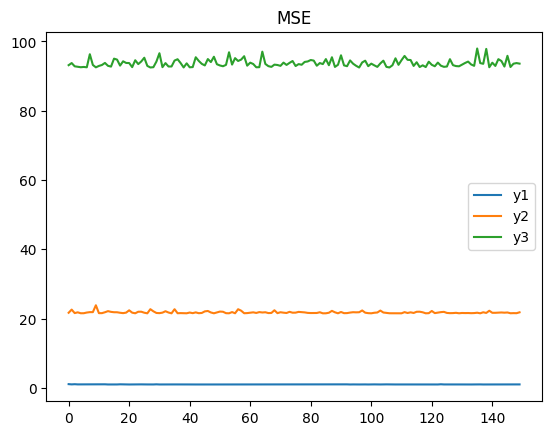

In [ ]:
s1, s2, s3 = sgd(), sgd(), sgd()
s1.fit(X,y1)
s2.fit(X,y2)
s3.fit(X,y3)

plt.plot(s1.MSE)
plt.plot(s2.MSE)
plt.plot(s3.MSE)
plt.legend(["y1","y2","y3"])
plt.title("MSE")
plt.show()

iteration 22
mse 1.0028486627898965
[2.06734505] 2.0673450538071587
iteration 31
mse 21.5406529302408
[2.28989235] 2.289892351888867
iteration 20
mse 92.47252331186817
[1.97868191] 1.9786819123288886


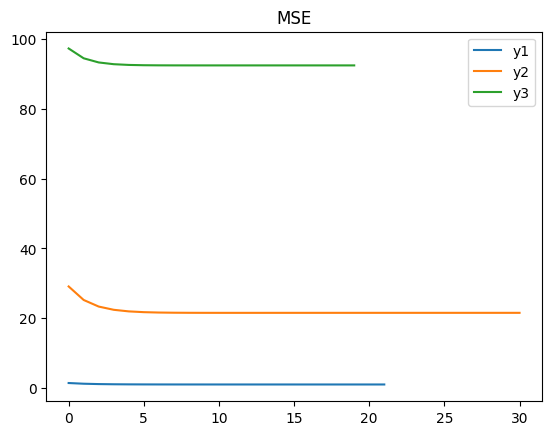

In [ ]:
m1, m2, m3 = MiniBatch(), MiniBatch(), MiniBatch()
m1.fit(X,y1)
m2.fit(X,y2)
m3.fit(X,y3)

plt.plot(m1.MSE)
plt.plot(m2.MSE)
plt.plot(m3.MSE)
plt.legend(["y1","y2","y3"])
plt.title("MSE")
plt.show()

iteration 92
mse 1.005096976582875
[2.07052556]
iteration 85
mse 21.644262530456427
[2.21923817]
iteration 70
mse 92.47616685000112
[2.05100594]


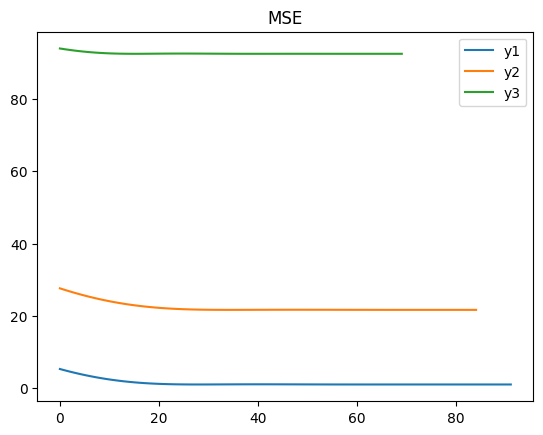

In [ ]:
a1, a2, a3 = Adam(), Adam(), Adam()
a1.fit(X,y1)
a2.fit(X,y2)
a3.fit(X,y3)

plt.plot(a1.MSE)
plt.plot(a2.MSE)
plt.plot(a3.MSE)
plt.legend(["y1","y2","y3"])
plt.title("MSE")
plt.show()

Ridge Regression

In [ ]:
class sgd_Ridge:
  def __init__(self,learning_rate = 0.01):
    self.learning_rate = learning_rate
    self.theta = None
    self.biais = None
    self.MSE = None
    self.stop = None
  def predict(self,x, theta, biais):
    return x.dot(theta) + biais
  def calcul_grad(self,x, error):
    return 2*np.dot(x,error)
  def fit(self,x,y,n_iteration=150,seuil = 1e-5,lbd=0.4):
    m,p= x.shape[0], x.shape[1]
    theta = np.random.randn(p)
    biais = 0
    MSE = []
    stop = n_iteration
    for k in range(n_iteration):
      for i in range(m):
        idx = np.random.randint(m)
        x_i = x[idx]
        y_i = y[idx]
        error = self.predict(x_i, theta, biais) - y_i
        gradient = self.calcul_grad(x_i, error) + 2*lbd*theta
        theta = theta - self.learning_rate * gradient
        biais = biais - self.learning_rate * (error.sum() + 2*lbd*biais)
      mse = np.mean(np.square(self.predict(x, theta, biais) - y))
      MSE.append(mse)
      if mse < seuil:
        print(f"iteration {k}")
        print(f"mse {mse}")
        stop = k
        break
    self.theta = theta
    self.biais = biais
    self.MSE = MSE
    self.stop = stop
    print(self.theta)



In [ ]:
ridge = sgd_Ridge(learning_rate=0.01)
ridge.fit(X,Y,n_iteration=150,lbd=0.01)

[1.83677175]


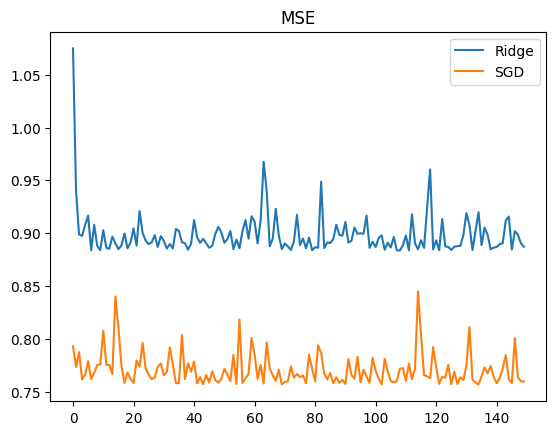

In [ ]:
plt.plot(ridge.MSE)
plt.plot(SGD.MSE)
plt.legend(["Ridge","SGD"])
plt.title("MSE")
plt.show()

In [ ]:
class MiniBatch_Ridge:
  def __init__(self,learning_rate = 0.01,batch_size = 5):
    self.learning_rate = learning_rate
    self.batch_size = batch_size
    self.theta = None
    self.biais = None
    self.MSE = None
    self.stop = None

  def predict(self,x, theta):
    return x.dot(theta)
  def calcul_grad(self,x, error):
    return 2*np.dot(x.T,error)

  def fit(self,x,y,n_iteration=150,seuil = 1e-5,lbd=0.01):
    m,p= x.shape
    X_b = np.c_[np.ones(m), x]
    data = np.hstack((X_b,Y.reshape(m,1)))
    np.random.shuffle(data)
    X_b = data[:,:-1]
    Y_b = data[:,-1]
    theta = np.random.randn(p+1)
    MSE = []
    step = m//self.batch_size
    reste = m%self.batch_size
    stop = n_iteration
    for k in range(n_iteration):
      for i in range(step):
        x_i = X_b[i*self.batch_size:(i+1)*self.batch_size]
        y_i = Y_b[i*self.batch_size:(i+1)*self.batch_size]
        error = self.predict(x_i, theta) - y_i
        gradient = (1/self.batch_size)*self.calcul_grad(x_i, error) + 2*lbd*theta
        theta = theta - self.learning_rate * gradient
      if reste != 0 :
        x_i = X_b[m-reste:]
        y_i = Y_b[m-reste:]
        error = self.predict(x_i, theta) - y_i
        gradient = (1/reste)*self.calcul_grad(x_i, error) + 2*lbd*theta
        theta = theta - self.learning_rate * gradient
      mse = np.mean(np.square(self.predict(X_b, theta) - Y_b))
      MSE.append(mse)
      if mse < seuil:
        print(f"iteration {k}")
        print(f"mse {mse}")
        stop = k+1
        break

    self.theta = theta[1:]
    self.biais = theta[0]
    self.MSE = MSE
    self.stop = stop
    print(theta[1:],theta[0])


In [ ]:
mb_ridge = MiniBatch_Ridge()
mb_ridge.fit(X,Y,lbd=0.01)

[1.82620008] -0.00915145725169111


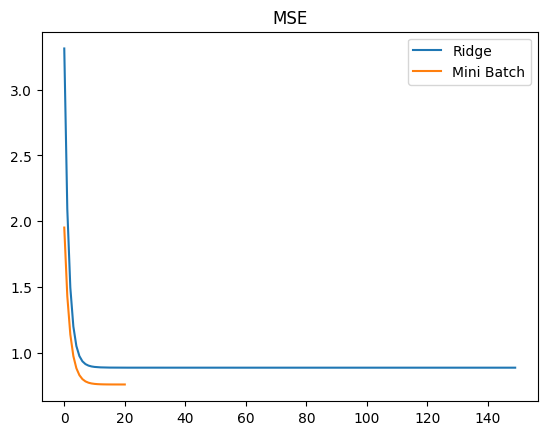

In [ ]:
plt.plot(mb_ridge.MSE)
plt.plot(MB.MSE)
plt.legend(["Ridge","Mini Batch"])
plt.title("MSE")
plt.show()

In [ ]:
class Adam_rdg:
  def __init__(self,learning_rate = 0.1,Beta = [0.9,0.999],epsilon = 1e-8):
    self.learning_rate = learning_rate
    self.Beta = Beta
    self.epsilon = epsilon
    self.theta = None
    self.MSE = None
    self.stop = None

  def predict(self,x, theta):
    return x.dot(theta)
  def calcul_grad(self,x, error):
    return 2*np.dot(x.T,error)
  def fit(self,x,y,n_iteration=150,seuil = 1e-5,lbd=0.01):
    m,p= x.shape
    theta = np.random.randn(p)
    nu = np.zeros(p)
    rho = np.zeros(p)
    stop = n_iteration
    MSE = []
    for k in range(n_iteration):
      error = self.predict(x, theta) - y
      mse = np.mean(error**2)
      MSE.append(mse)
      if mse < seuil:
        print(f"iteration {k}")
        print(f"mse {mse}")
        stop = k+1
        break
      else :
        gradients =(1/m) * self.calcul_grad(x, error) + 2*lbd*theta
        nu = self.Beta[0]*nu + (1-self.Beta[0])*gradients
        rho = self.Beta[1]*rho + (1-self.Beta[1])*(gradients**2)
        nu_hat = nu/(1-self.Beta[0]**(k+1))
        rho_hat = rho/(1-self.Beta[1]**(k+1))
        b = nu_hat/(np.sqrt(rho_hat) + self.epsilon)
        theta = theta - self.learning_rate * b
    print(theta)
    self.theta = theta
    self.MSE = MSE
    self.stop = stop



In [ ]:

adam_rdg = Adam_rdg()
adam_rdg.fit(X,Y,lbd=0.01)

[1.83344037]


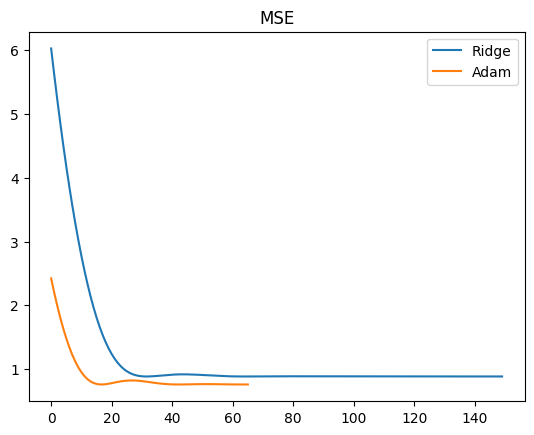

In [ ]:
plt.plot(adam_rdg.MSE)
plt.plot(adam.MSE)
plt.legend(["Ridge","Adam"])
plt.title("MSE")
plt.show()